In [67]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import keras
from keras import layers
from importlib import reload
from sklearn.metrics import classification_report
import copy
import helper

Load lại dataset đã được tiền xử lý

In [70]:
X_train, X_test, y_train, y_test = helper.load_data()

Vì vấn đề là classification, và output layer có activation là softmax, nên target cần phải encode theo onehot (có thể dùng dummy, hoặc to_categorial của keras.utils).\
Ở đây chúng tôi xin sử dụng to_categorical trong keras.utils.

In [72]:
from keras.utils import to_categorical
y_train_tmp = copy.copy(y_train)
y_train_tmp = to_categorical(y_train_tmp)
y_train_onehot = y_train_tmp
print(y_train_onehot)

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


### Build model

In [36]:
model = keras.models.Sequential([
    layers.Dense(16, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax') # target có 4 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Fit model

In [37]:
history = model.fit(X_train, y_train_onehot, epochs=130, batch_size=100, validation_split=0.2, verbose=1)

Epoch 1/130


36/36 [==============================] - 1s 9ms/step - loss: 1.1847 - accuracy: 0.5083 - val_loss: 1.0247 - val_accuracy: 0.6865
Epoch 2/130
36/36 [==============================] - 0s 3ms/step - loss: 0.8855 - accuracy: 0.7152 - val_loss: 0.8199 - val_accuracy: 0.7100
Epoch 3/130
36/36 [==============================] - 0s 2ms/step - loss: 0.7315 - accuracy: 0.7303 - val_loss: 0.6998 - val_accuracy: 0.7178
Epoch 4/130
36/36 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.7567 - val_loss: 0.6033 - val_accuracy: 0.7783
Epoch 5/130
36/36 [==============================] - 0s 3ms/step - loss: 0.5504 - accuracy: 0.8085 - val_loss: 0.5262 - val_accuracy: 0.8186
Epoch 6/130
36/36 [==============================] - 0s 4ms/step - loss: 0.4771 - accuracy: 0.8449 - val_loss: 0.4602 - val_accuracy: 0.8287
Epoch 7/130
36/36 [==============================] - 0s 3ms/step - loss: 0.4170 - accuracy: 0.8628 - val_loss: 0.4096 - val_accuracy: 0.8421
Epoch 8/130
36/36 [======

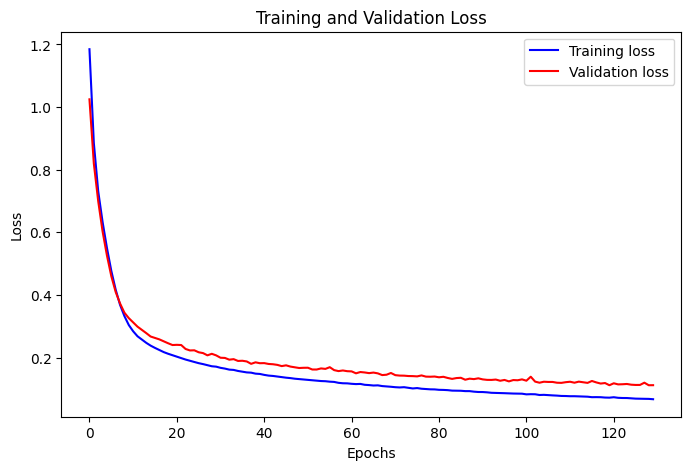

In [38]:
helper.plot_Loss_Val(history)

Tóm tắt các thông tin sau khi fit

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 820 (3.20 KB)
Trainable params: 820 (3.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Predict

In [40]:
y_pred = model.predict(X_test)
y_pred[:5]

47/47 [==============================] - 0s 840us/step


array([[9.9999285e-01, 7.1531204e-06, 7.9972636e-20, 5.0428068e-29],
       [7.5277443e-05, 9.9124980e-01, 9.9577584e-05, 8.5752923e-03],
       [1.8201102e-07, 9.9999976e-01, 4.0972142e-10, 3.4651472e-16],
       ...,
       [3.8002004e-11, 2.6278629e-03, 2.4221791e-03, 9.9494994e-01],
       [6.0483004e-14, 4.6384797e-05, 5.2087267e-05, 9.9990153e-01],
       [4.1445834e-03, 9.9583566e-01, 1.9790214e-05, 5.1333598e-10]],
      dtype=float32)

Với mỗi hàng trong ma trận trên chính là xác xuất của từng class khi model dự đoán 1 input.\
Với mỗi hàng ta sẽ lấy index của element có giá trị lớn nhất, index này cũng chính là class mà model dự đoán cho 1 input.

In [41]:
y_pred = y_pred.argmax(axis=1)
y_pred[:5]

array([0, 1, 1, ..., 3, 3, 1], dtype=int64)

Ta thấy rằng model FFNN này có tỉ lệ dự đóan của model này ở mức cao lên đến 99%.

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       179
           1       0.98      0.98      0.98       941
           2       0.92      0.79      0.85       102
           3       0.94      0.98      0.96       266

    accuracy                           0.96      1488
   macro avg       0.95      0.93      0.94      1488
weighted avg       0.96      0.96      0.96      1488

